In [1]:
import pandas as pd
import numpy as np
import os, sys

In [2]:
def queryFiles(pd, file, filter_=None, columns=None):
    dfs = list()
    if os.path.exists(file):
        print('Parsing file: {}'.format(file))
        iter_csv = pd.read_csv(file, sep=',', compression='gzip', iterator=True, chunksize=100000)
        if filter_ == None:
            if columns == None:
                df = pd.concat([chunk for chunk in iter_csv])
            else:
                df = pd.concat([chunk[columns] for chunk in iter_csv])
        else:
            if columns == None:
                df = pd.concat([chunk[filter_(chunk)] for chunk in iter_csv])
            else:
                df = pd.concat([chunk[filter_(chunk)][columns] for chunk in iter_csv])
        dfs.append(df)
    else:
        print('Warning: file {} doesn\'t exist!'.format(file))
    dfAll = pd.concat(dfs)
    return dfAll

In [5]:
inputFile = '/home/martin/Downloads/Accidents0514.csv.tar.gz'
cols = ['Accidents0514.csv','Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Date','Day_of_Week']

In [6]:
df = queryFiles(pd, inputFile, None, cols)

/home/martin/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3006: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/home/martin/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3006: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Parsing file: /home/martin/Downloads/Accidents0514.csv.tar.gz


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640597 entries, 0 to 40596
Data columns (total 6 columns):
Accidents0514.csv       1640597 non-null object
Accident_Severity       1640597 non-null int64
Number_of_Vehicles      1640597 non-null int64
Number_of_Casualties    1640597 non-null int64
Date                    1640597 non-null object
Day_of_Week             1640597 non-null int64
dtypes: int64(4), object(2)
memory usage: 87.6+ MB


In [8]:
descDwLink = 'https://dl.dropboxusercontent.com/u/45463862/Road-Accident-Safety-Data-Guide-1979-2004.xls'
descDict = pd.read_excel(descDwLink, sheetname=None)

In [10]:
df[df.Number_of_Casualties == df.Number_of_Casualties.max()]

,Accidents0514.csv,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week
86319,20144100J0489,2,2,93,20/10/2014,2


In [12]:
df[df.Accident_Severity == 1].groupby('Number_of_Casualties').size()

Number_of_Casualties
1     11978
2      4922
3      2178
4      1178
5       577
6       279
7       125
8        49
9        27
10       16
11       11
12        5
13        7
14        3
15        1
16        3
17        3
18        1
19        1
21        2
22        2
24        1
27        1
29        1
38        1
40        1
42        2
43        1
45        1
48        1
51        2
62        1
68        1
dtype: int64

In [16]:
df.Day_of_Week.unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Saturday',
       'Sunday'], dtype=object)

In [15]:
df['Day_of_Week'] = df.Day_of_Week.map(descDict['Day of Week'].set_index('code')['label'])

In [20]:
%matplotlib inline

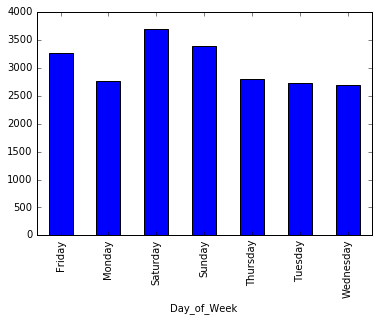

In [21]:
df[df.Accident_Severity == 1].groupby('Day_of_Week').size().plot.bar()

In [22]:
df['Date'].head()

0    04/01/2005
1    05/01/2005
2    06/01/2005
3    07/01/2005
4    10/01/2005
Name: Date, dtype: object

In [23]:
df['Date'] = pd.to_datetime(df.Date)

In [24]:
df.head()

,Accidents0514.csv,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week
0,200501BS00001,2,1,1,2005-04-01,Tuesday
1,200501BS00002,3,1,1,2005-05-01,Wednesday
2,200501BS00003,3,2,1,2005-06-01,Thursday
3,200501BS00004,3,1,1,2005-07-01,Friday
4,200501BS00005,3,1,1,2005-10-01,Monday
